###Importing Libraries

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [185]:
data = pd.read_csv("/content/fetal_health dataset.csv")

In [186]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [187]:
data.shape

(2126, 22)

###Data Preparation

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [189]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [190]:
data.isnull().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

In [191]:
data['fetal_health'].value_counts()

fetal_health
1    1655
2     295
3     176
Name: count, dtype: int64

<Axes: xlabel='fetal_health', ylabel='count'>

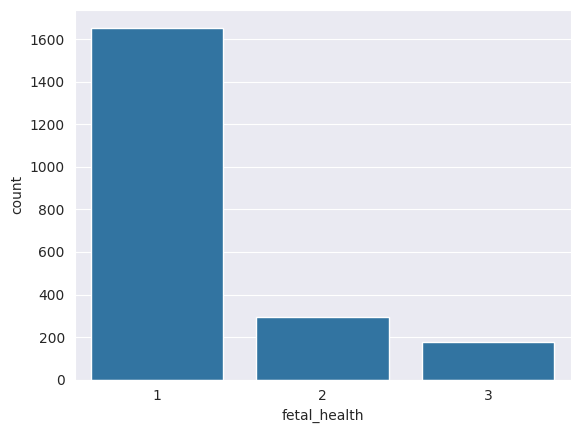

In [192]:
sns.countplot(data=data,x="fetal_health")

In [193]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


###Exploratory Data Analysis

###Univariate analysis

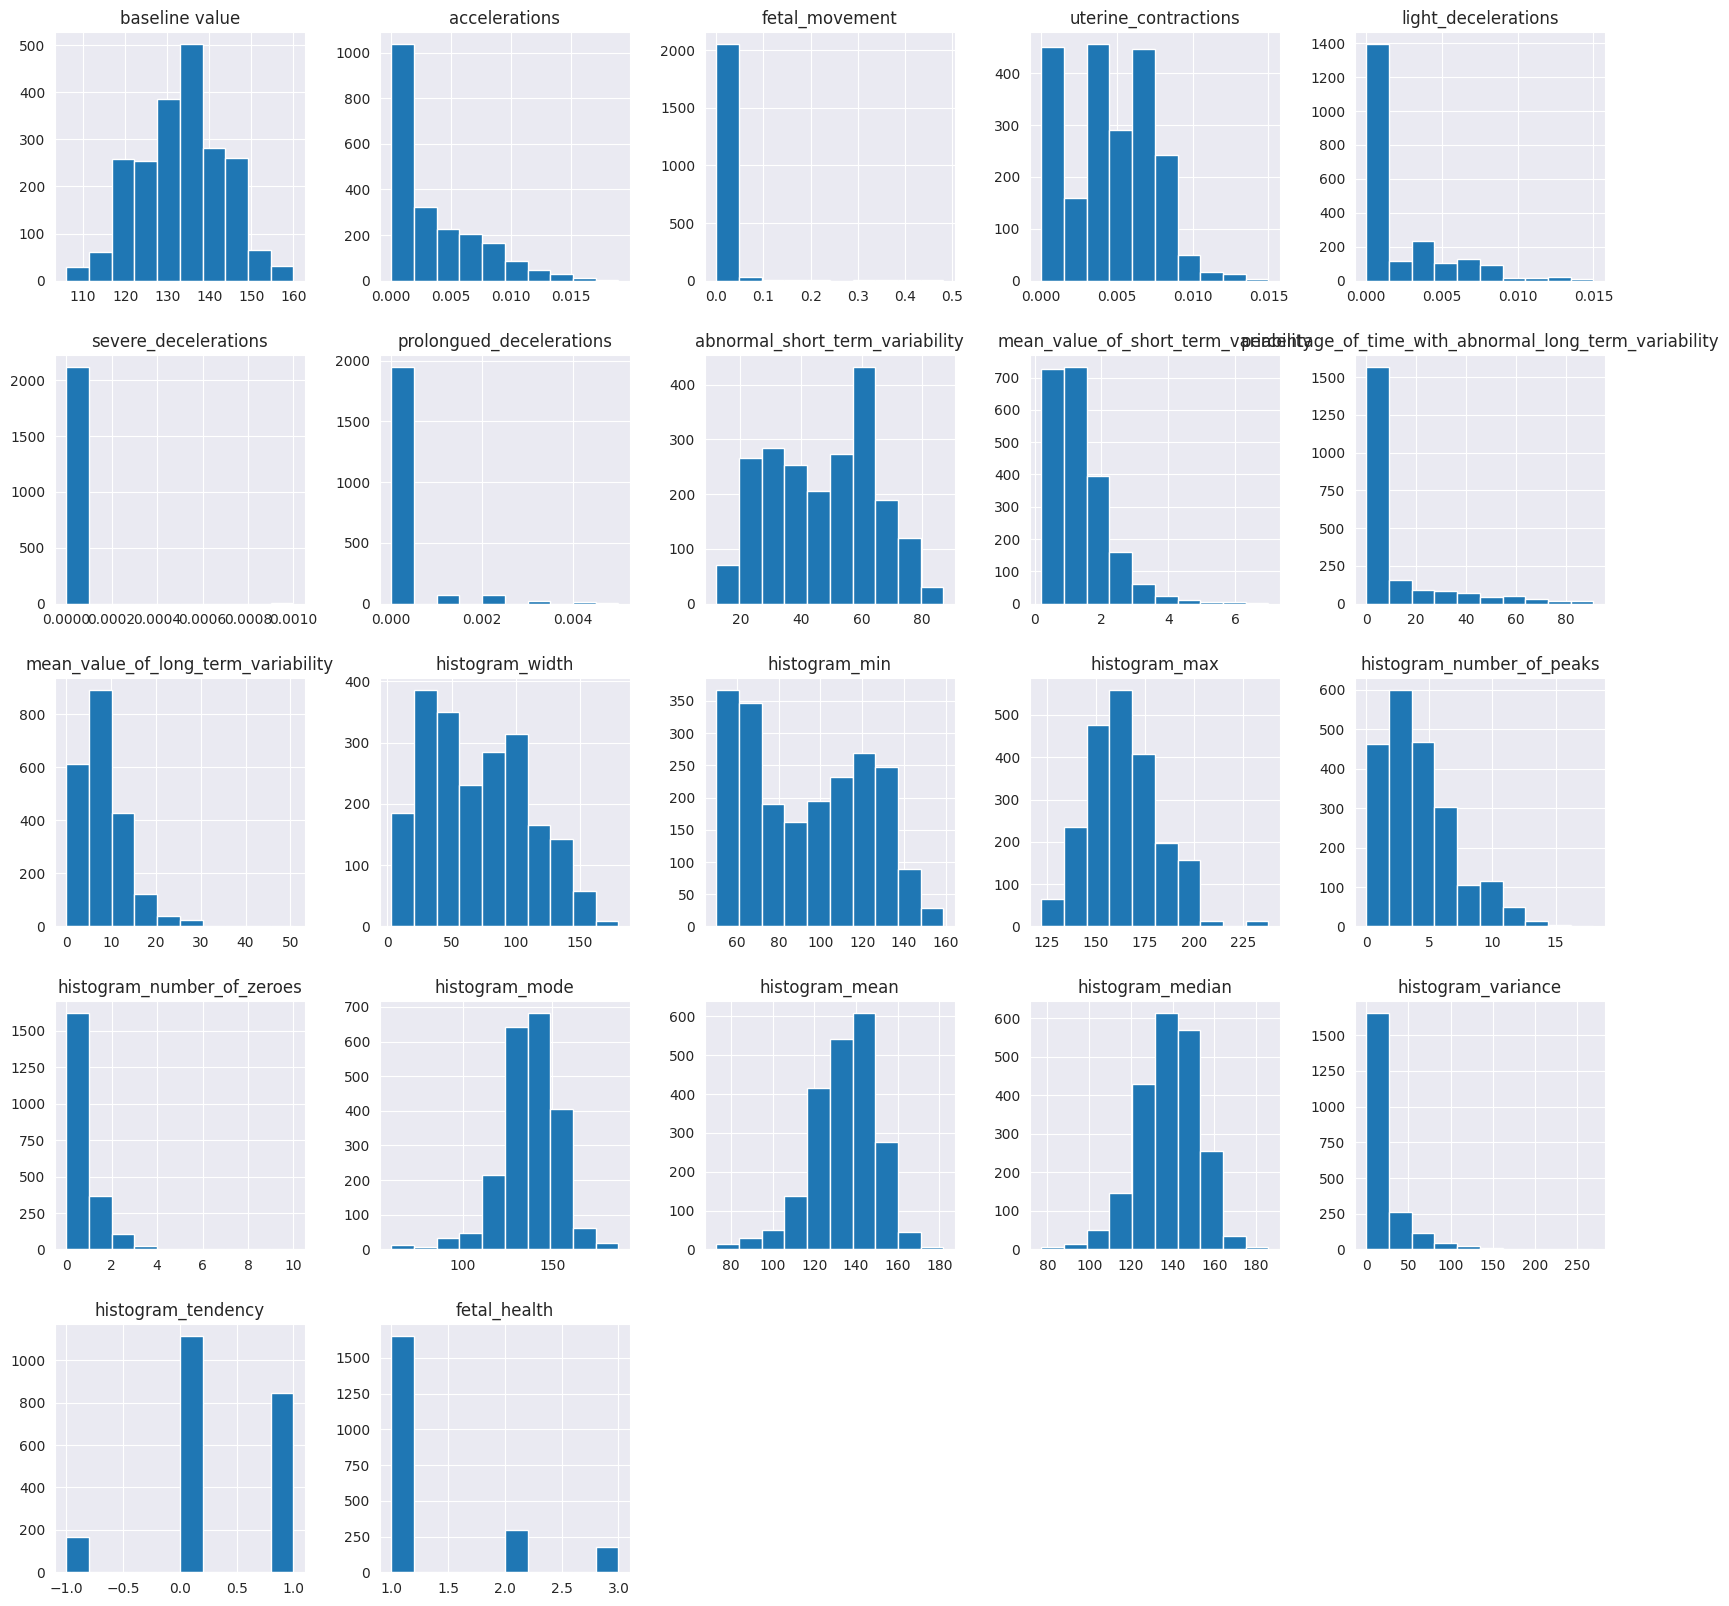

In [194]:
data.hist(figsize=(20,20), layout=(5,5), sharex=False);

###Bivariate Analysis

<Axes: xlabel='fetal_movement', ylabel='fetal_health'>

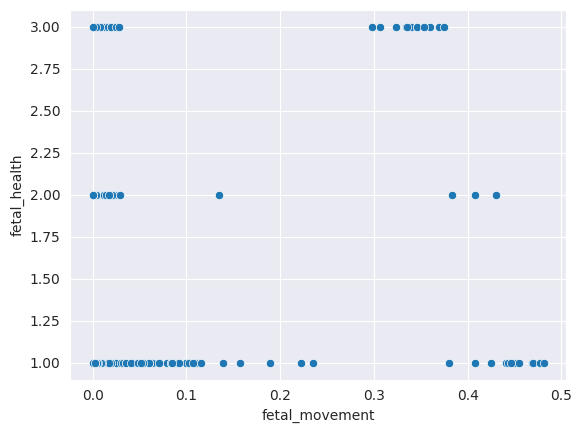

In [195]:
sns.scatterplot(x='fetal_movement', y='fetal_health',data=data)

###Multivariate analysis

<Axes: >

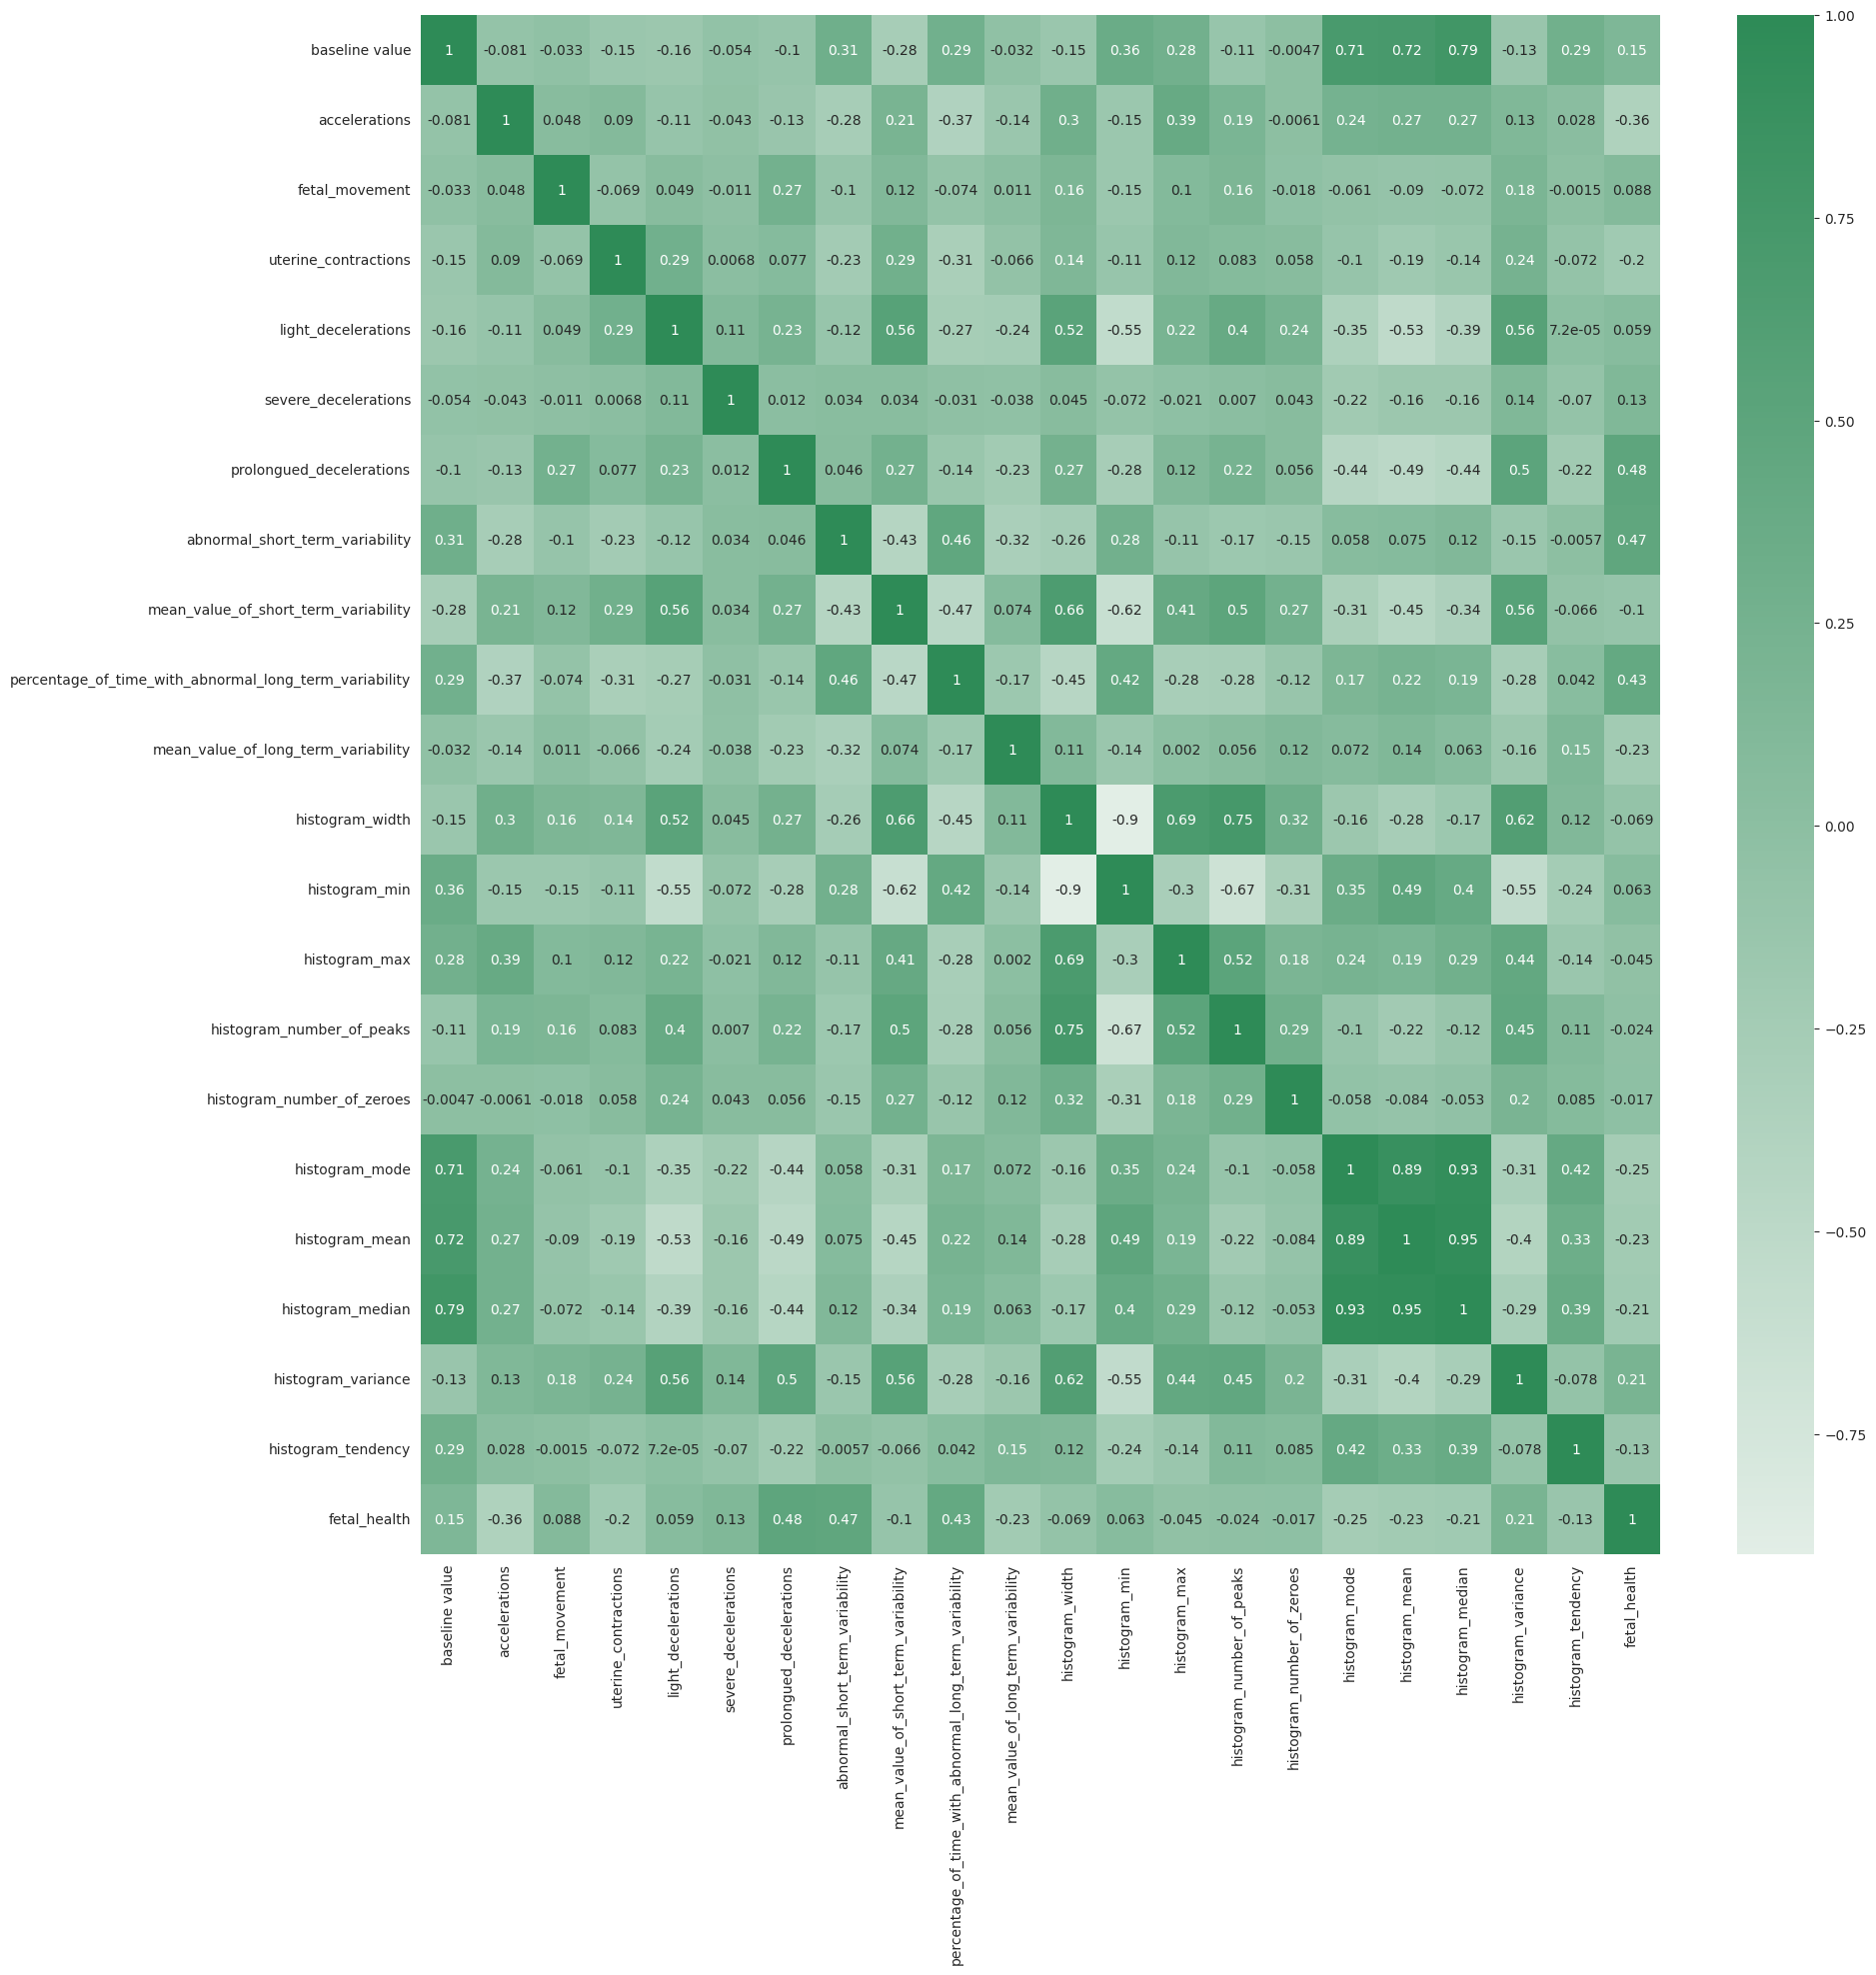

In [196]:
corrmat=data.corr()
plt.figure(figsize=(20,20))
cmap=sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(corrmat,annot=True,cmap=cmap,center=0)

In [197]:
data.corr()["fetal_health"].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

###Feature Selection

In [198]:
new_data=data.loc[:,["prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability", "histogram_variance", "histogram_median", "mean_value_of_long_term_variability", "histogram_mode", "accelerations"]]


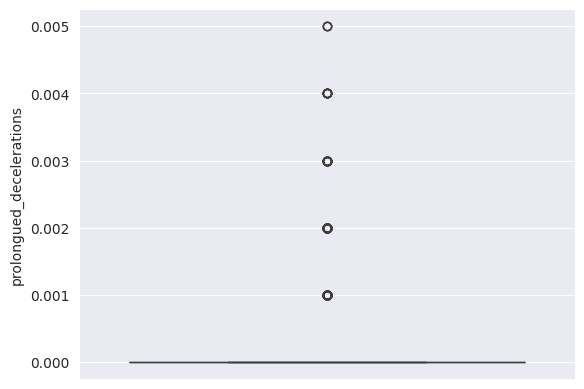

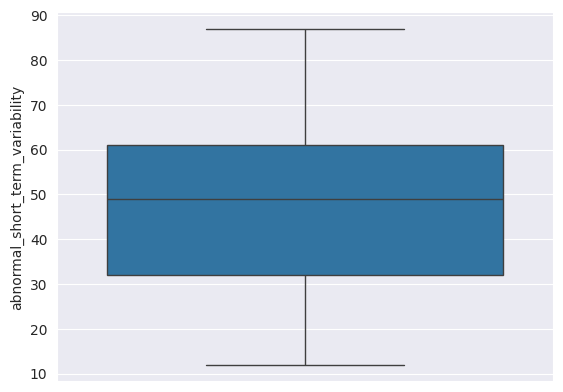

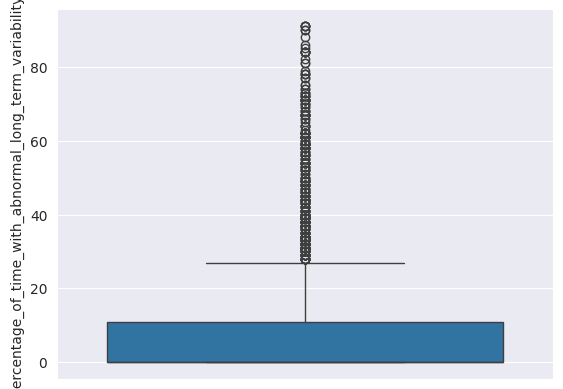

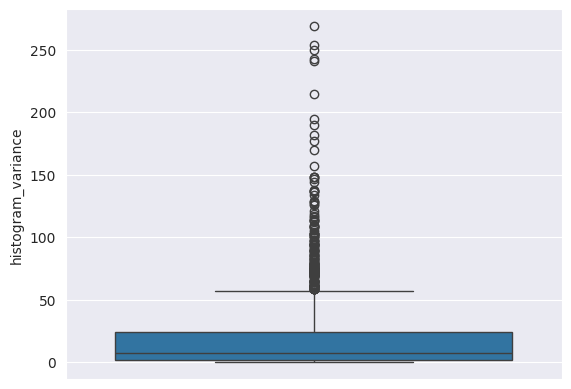

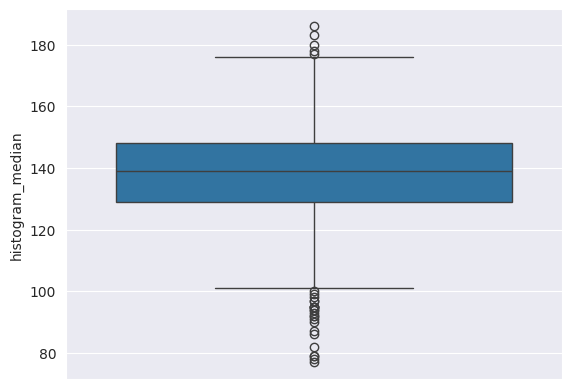

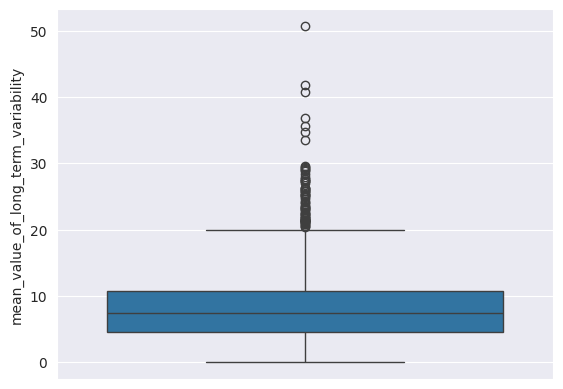

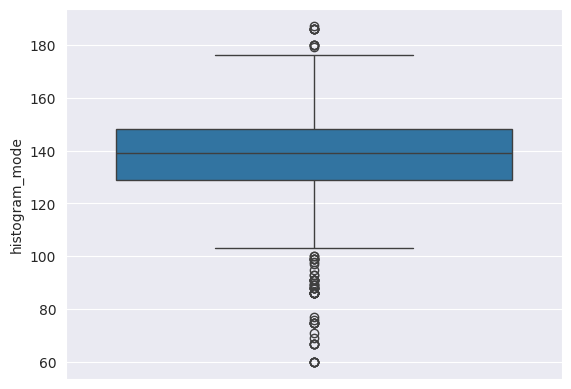

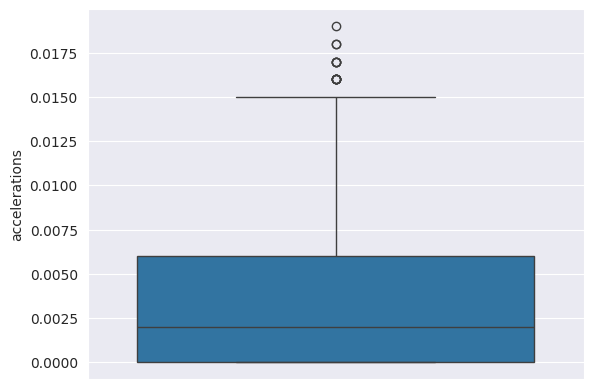

In [199]:
k=(["prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability", "histogram_variance", "histogram_median", "mean_value_of_long_term_variability", "histogram_mode", "accelerations"])
for i in k:
  sns.boxplot(data[i])
  plt.show()


In [200]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
for i in k:
  data[i]=np.where(data[i]>upper_limit[i],upper_limit[i],data[i])
  data[i]=np.where(data[i]<lower_limit[i],lower_limit[i],data[i])


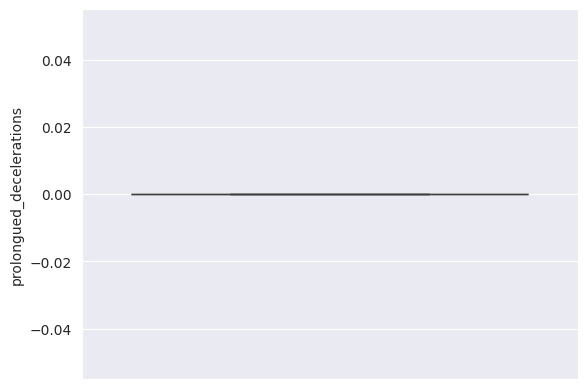

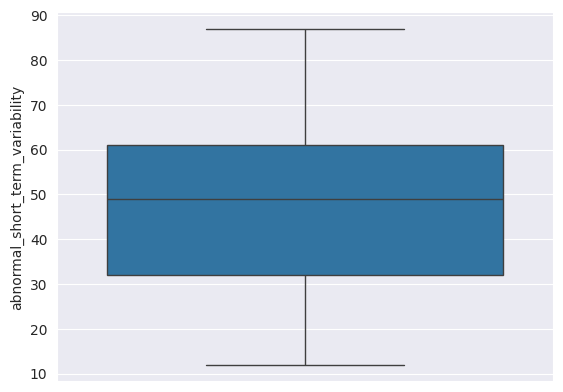

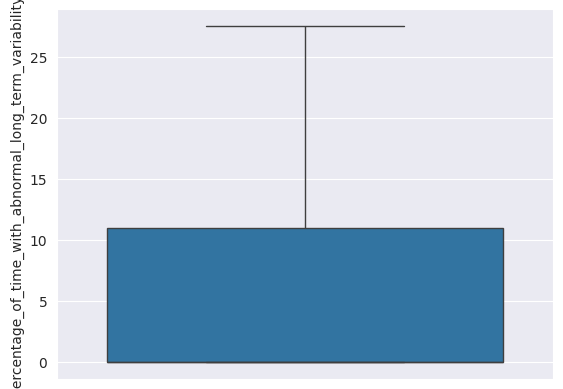

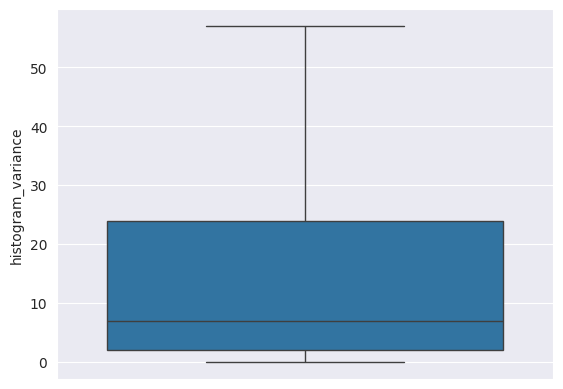

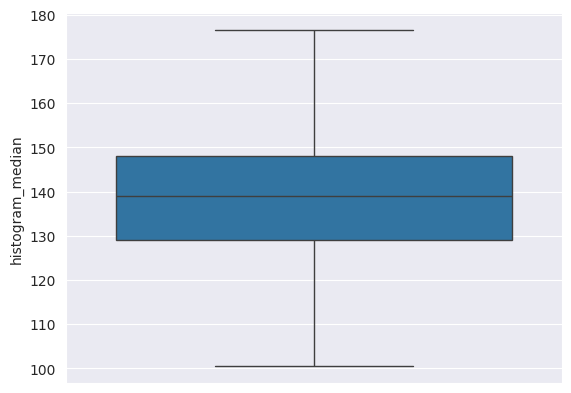

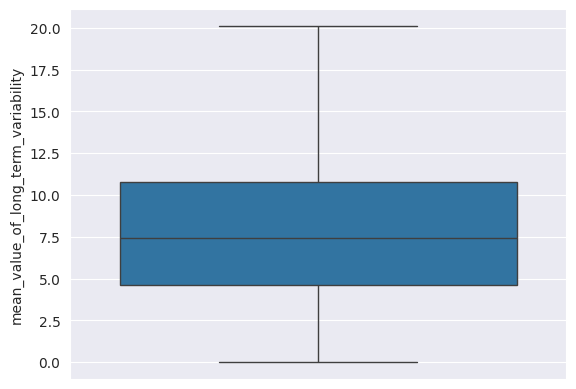

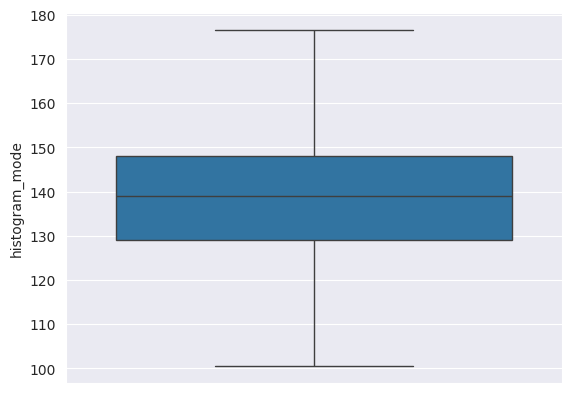

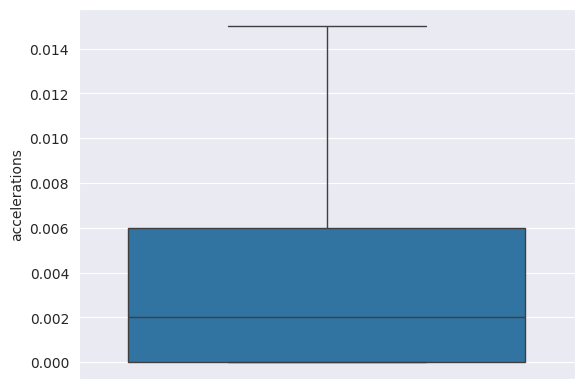

In [201]:
k=(["prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability", "histogram_variance", "histogram_median", "mean_value_of_long_term_variability", "histogram_mode", "accelerations"])
for i in k:
  sns.boxplot(data[i])
  plt.show()

###Separating Data

In [202]:
X = new_data
y = data['fetal_health']
y.head()

0    2
1    1
2    1
3    1
4    1
Name: fetal_health, dtype: int64

In [203]:
X.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,histogram_median,mean_value_of_long_term_variability,histogram_mode,accelerations
0,0.0,73,43,73,121,2.4,120,0.000
1,0.0,17,0,12,140,10.4,141,0.006
2,0.0,16,0,13,138,13.4,141,0.003
3,0.0,16,0,13,137,23.0,137,0.003
4,0.0,16,0,11,138,19.9,137,0.007


###Scaling Data

In [204]:
scale = MinMaxScaler()
X = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,histogram_median,mean_value_of_long_term_variability,histogram_mode,accelerations
0,0.0,0.813333,0.472527,0.271375,0.403670,0.047337,0.472441,0.000000
1,0.0,0.066667,0.000000,0.044610,0.577982,0.205128,0.637795,0.315789
2,0.0,0.053333,0.000000,0.048327,0.559633,0.264300,0.637795,0.157895
3,0.0,0.053333,0.000000,0.048327,0.550459,0.453649,0.606299,0.157895
4,0.0,0.053333,0.000000,0.040892,0.559633,0.392505,0.606299,0.368421


### Splitting data into train and test

In [205]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
x_train.shape, x_test.shape

((1488, 8), (638, 8))

###Applying SMOTE for balancing the data

In [206]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train.astype('float'), y_train)

In [207]:
from collections import Counter
print("Before Smote:",Counter(y_train))
print("After Smote:",Counter(y_train_smote))

Before Smote: Counter({1: 1155, 2: 210, 3: 123})
After Smote: Counter({1: 1155, 3: 1155, 2: 1155})


###Model Building

###Random Forest

In [208]:
Rf_model = RandomForestClassifier()
Rf_model.fit(x_train_smote, y_train_smote)
Rf_model_pred = Rf_model.predict(x_test)
print(accuracy_score(y_test, Rf_model_pred))

0.9435736677115988


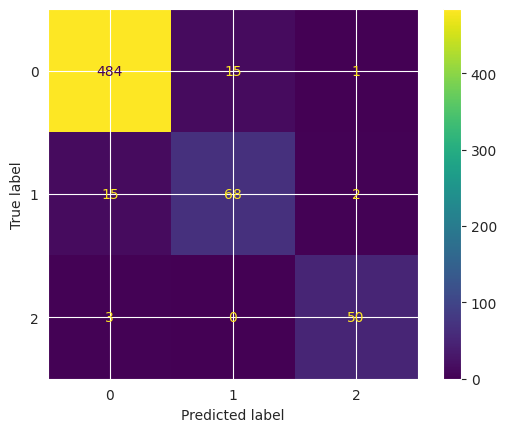

In [209]:
cm = confusion_matrix(y_test, Rf_model_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

###Decision Tree

In [210]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train_smote, y_train_smote)
DT_model_pred = DT_model.predict(x_test)
print(accuracy_score(y_test, DT_model_pred))

0.9216300940438872


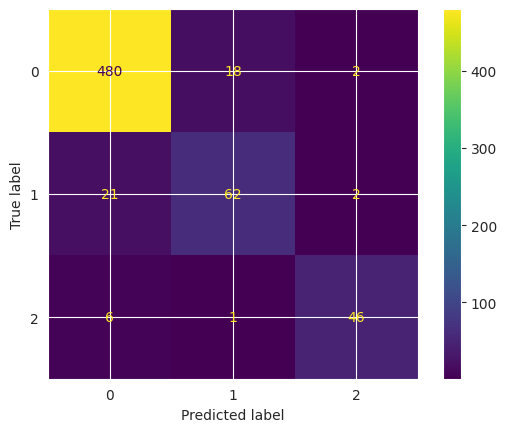

In [211]:
cm = confusion_matrix(y_test, DT_model_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

###Logistic Regression

In [212]:
LR_model = LogisticRegression()
LR_model.fit(x_train_smote, y_train_smote)
LR_model_pred = LR_model.predict(x_test)
print(accuracy_score(y_test, LR_model_pred))

0.8605015673981191


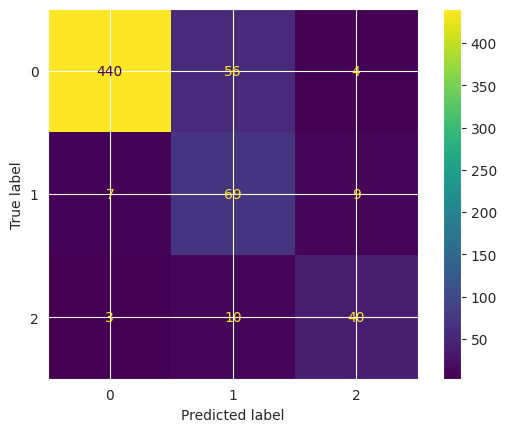

In [213]:
cm = confusion_matrix(y_test, LR_model_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

###K-Nearest Neighbors

In [214]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train_smote, y_train_smote)
KNN_model_pred = KNN_model.predict(x_test)
print(accuracy_score(y_test, KNN_model_pred))

0.9153605015673981


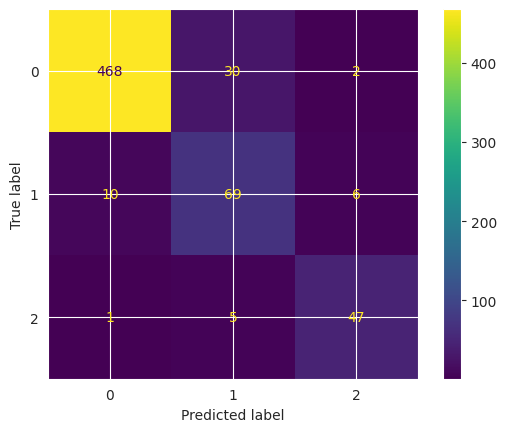

In [215]:
cm = confusion_matrix(y_test, KNN_model_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

###Testing  Model

###Random Forest

In [216]:
Rf_model.predict([[0.0,17.0,0.0,12.0,140.0,16.4,141.0,132.0]])

array([1])

In [217]:
Rf_model.predict([[0.0,74,36,1,145,5.0,145,0.002]])

array([3])

###Decision Tree

In [218]:
DT_model.predict([[0.0,17.0,0.0,12.0,140.0,16.4,141.0,132.0]])

array([2])

In [219]:
DT_model.predict([[0.0,74,36,1,145,5.0,145,0.002]])

array([3])

###Logistic Regression

In [220]:
LR_model.predict([[0.0,17.0,0.0,12.0,140.0,16.4,141.0,132.0]])

array([1])

In [221]:
LR_model.predict([[0.0,74,36,1,145,5.0,145,0.002]])

array([2])

###K-Nearest Neighbors

In [222]:
KNN_model.predict([[0.0,17.0,0.0,12.0,140.0,16.4,141.0,132.0]])

array([1])

In [223]:
KNN_model.predict([[0.0,74,36,1,145,5.0,145,0.002]])

array([1])

###Performance Testing

In [224]:
df = pd.DataFrame(columns=['Model', 'Accuracy' ])
df['Model'] = ['Random Forest', 'Decision Tree', 'LogisticRegression', '   K-Nearest Neighbors']
df['Accuracy'] = [accuracy_score(y_test, Rf_model_pred), accuracy_score(y_test, DT_model_pred), accuracy_score(y_test, LR_model_pred), accuracy_score(y_test, KNN_model_pred)]
df

,Model,Accuracy
0,Random Forest,0.943574
1,Decision Tree,0.921630
2,LogisticRegression,0.860502
3,K-Nearest Neighbors,0.915361


<Axes: xlabel='Accuracy', ylabel='Model'>

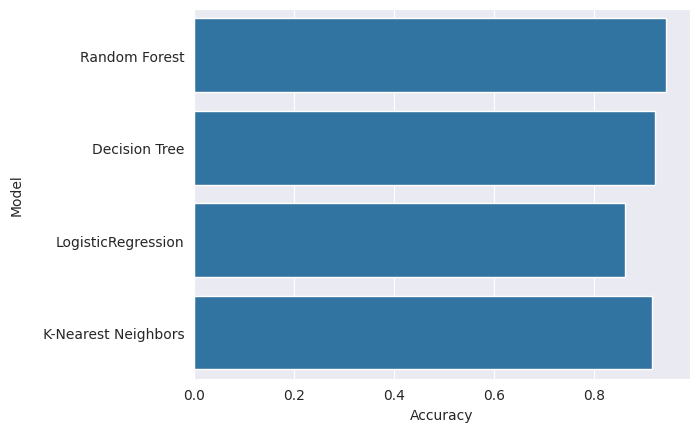

In [225]:
sns.set_style('darkgrid')
sns.barplot(x='Accuracy', y='Model', data=df)

###Saving The Best Model

In [226]:
import pickle
pickle.dump(LR_model, open('fetal_health_model.pkl', 'wb'))